In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch.nn as nn #imports many neural network functions

In [3]:
 X = torch.linspace(1,50,50).reshape(-1,1)

In [4]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [5]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype = torch.float)

In [6]:
e #random noise variable

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [7]:
y = 2*X + 1 + e 

In [8]:
y.shape

torch.Size([50, 1])

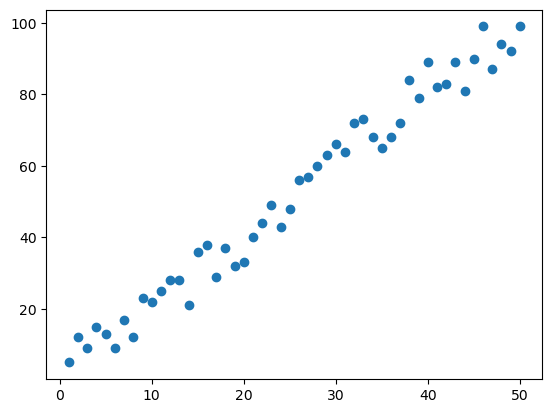

In [9]:
plt.scatter(X.numpy(),y.numpy()) #to plot we need tot convert in numpy

In [10]:
torch.manual_seed(59)
model = nn.Linear(in_features=1,out_features=1)
#linear models with number of in and out features as input is only x meanhwile output is only y we put 1
print(model.weight)#arbitary weight and bias according to the seed
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [11]:
#model class for only 1 layer
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        #iniate a object with Model class with in and out features parametes
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
        #it passes .linear attribute the properties of nn.Linear object 
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred
        #it uses the linear attribute to predict y for x input

In [12]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [13]:
for name,param in model.named_parameters():
    #to get all the available parameters of the model object
    print(name,'\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [14]:
x  = torch.tensor([2.0])
print(model.forward(x))
#gives w*x+b=> .105.. * 2 + 0.963.. which is 1.173 approx

tensor([1.1758], grad_fn=<AddBackward0>)


In [15]:
#because we are using randomly generated weights and bias we dont expect good results from the model
w1 = .1059
b1 = 0.9637
y1 = w1*X + b1

In [16]:
y1

tensor([[1.0696],
        [1.1755],
        [1.2814],
        [1.3873],
        [1.4932],
        [1.5991],
        [1.7050],
        [1.8109],
        [1.9168],
        [2.0227],
        [2.1286],
        [2.2345],
        [2.3404],
        [2.4463],
        [2.5522],
        [2.6581],
        [2.7640],
        [2.8699],
        [2.9758],
        [3.0817],
        [3.1876],
        [3.2935],
        [3.3994],
        [3.5053],
        [3.6112],
        [3.7171],
        [3.8230],
        [3.9289],
        [4.0348],
        [4.1407],
        [4.2466],
        [4.3525],
        [4.4584],
        [4.5643],
        [4.6702],
        [4.7761],
        [4.8820],
        [4.9879],
        [5.0938],
        [5.1997],
        [5.3056],
        [5.4115],
        [5.5174],
        [5.6233],
        [5.7292],
        [5.8351],
        [5.9410],
        [6.0469],
        [6.1528],
        [6.2587]])

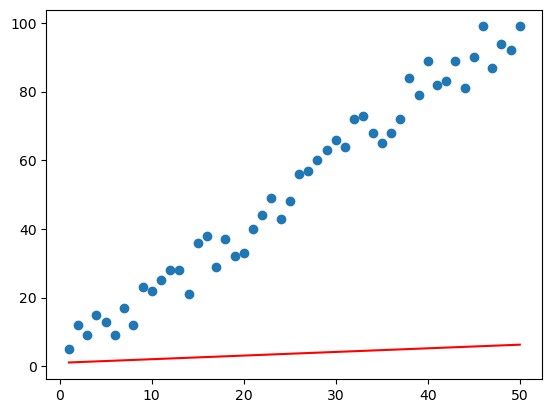

In [17]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(X,y1,'r')

In [18]:
#to fit we can define our on function but we will use nn.MSELoss() function.
criterion = nn.MSELoss()

In [19]:
#learning rate optimizer can be set to stochastic gradient descent(SGD)
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [20]:
epochs =  50
losses = []
for i in range(epochs):
    i=i+1
    y_pred = model.forward(X) #predicting on forward pass
    loss = criterion(y_pred,y)#calculation of loss
    losses.append(loss.detach().numpy())#storing the loss
    print(f"epoch {i} loss:{loss.item()} weight:{model.linear.weight.item()} bias:{model.linear.bias.item()}")
    optimizer.zero_grad() #resets the gradient for each epoch
    loss.backward()#backpropogation
    optimizer.step()#updates the hyperparameters

epoch 1 loss:3057.216796875 weight:0.10597813129425049 bias:0.9637961387634277
epoch 2 loss:1588.5311279296875 weight:3.334900379180908 bias:1.0604636669158936
epoch 3 loss:830.2999877929688 weight:1.0148327350616455 bias:0.9922628402709961
epoch 4 loss:438.8524169921875 weight:2.6817996501922607 bias:1.0425218343734741
epoch 5 loss:236.7615203857422 weight:1.4840211868286133 bias:1.0076650381088257
epoch 6 loss:132.4291229248047 weight:2.3446059226989746 bias:1.0339646339416504
epoch 7 loss:78.56572723388672 weight:1.7262253761291504 bias:1.0163217782974243
epoch 8 loss:50.75775909423828 weight:2.170504093170166 bias:1.0302516222000122
epoch 9 loss:36.4012336730957 weight:1.8512457609176636 bias:1.0214954614639282
epoch 10 loss:28.989229202270508 weight:2.0806007385253906 bias:1.029038906097412
epoch 11 loss:25.162382125854492 weight:1.9157683849334717 bias:1.0248701572418213
epoch 12 loss:23.186473846435547 weight:2.034165620803833 bias:1.0291162729263306
epoch 13 loss:22.16612625122

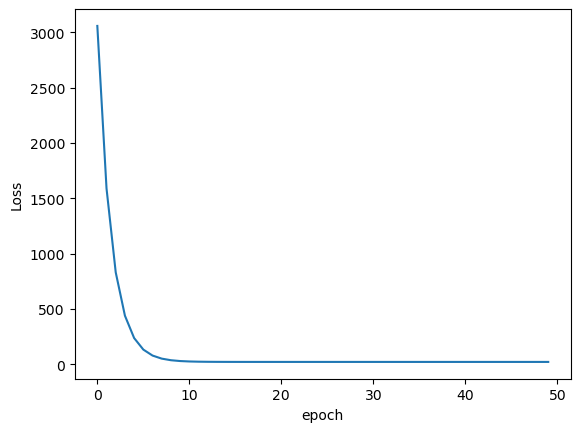

In [21]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [22]:
x = np.linspace(0.0,50.0,50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*x + current_bias

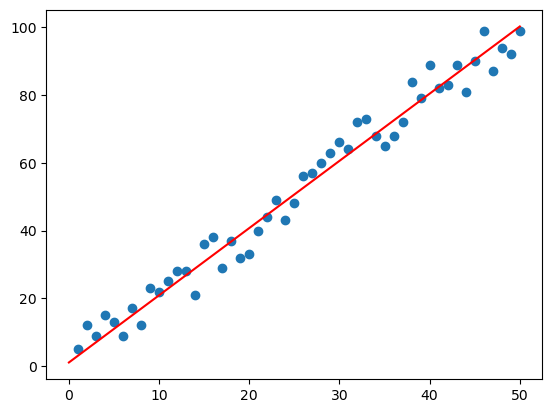

In [23]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')